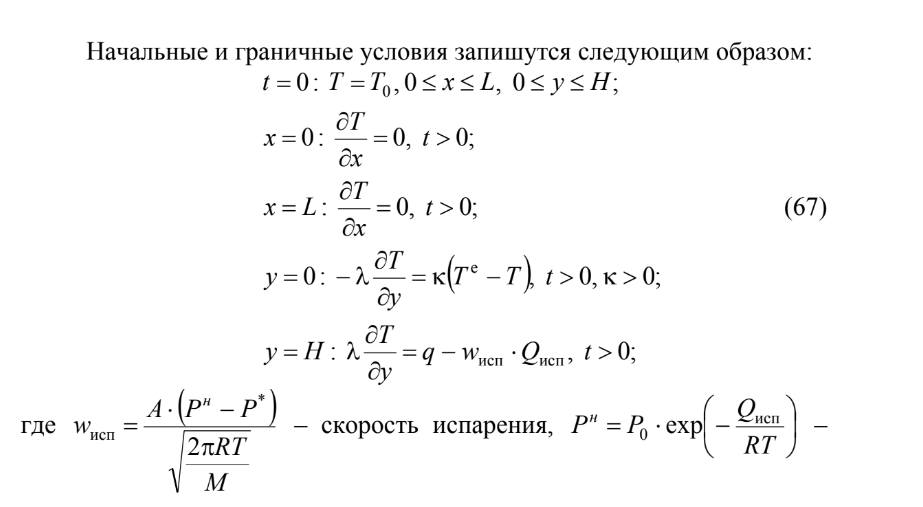
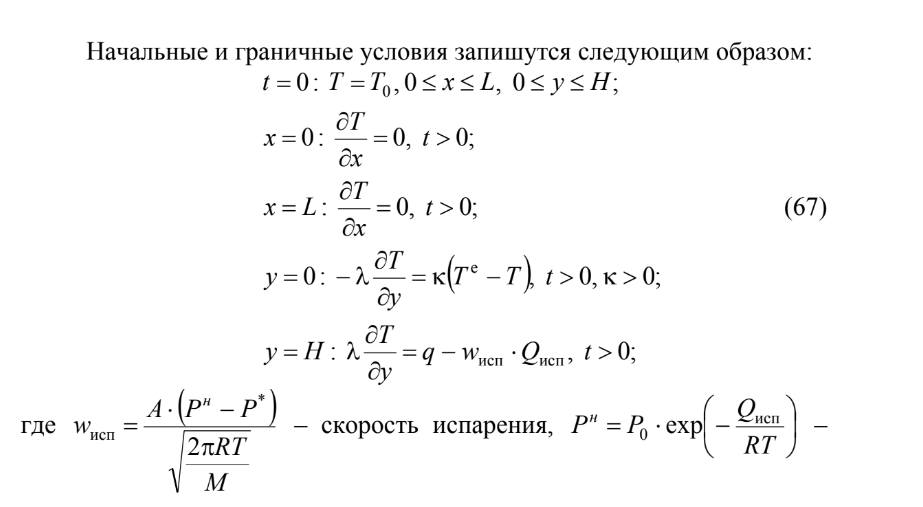


Константы, заполнение матриц, коэффицентов прогонки

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

L = 0.3
H = 0.3
var_lambda = 60
ro = 3070
c = 1260
M = 0.084
T_0 = 1273
A = 0.1
k_0 = 10**5
q = 10**4
Q_vap = 3.8*(10**4)
k = 50
T_e = 600
time = 0
P_atm = 101325
# print('Enter number of x steps')
N_x = int(input())
step_x = L/(N_x-1)
# print('Enter number of y steps')
N_y = int(input())
step_y = H/(N_y-1)
# print('Enter end time in seconds')
end_time = int(input())
tau = end_time/1000
P0 = 100000
T_net = np.full((max(N_x,N_y),max(N_x,N_y)),T_0,dtype='float')
alpha = [0]*N_x
beta = [0]*N_x

102
102
120


Прогонка системы

In [2]:
while time <= end_time:
    time += tau
    #решаем СЛАУ в направлении оси Ох
    for j in range(N_y):
        #определяем начальные прогоночные коэффициенты на основе левого граничного условия
        alpha[0] = 2*tau*var_lambda/(2*tau*var_lambda+ro*c*(step_x**2))
        beta[0] = ro*c*(step_x**2)*T_net[0,j]/(2*tau*var_lambda+ro*c*(step_x**2))
        for i in range(1,N_x-1):
            # Считаем значения для вычисления коэффициентов для i строки 3-диагональной матрицы
            a_i = var_lambda/(step_x**2)
            b_i = 2*var_lambda/(step_x**2)+ro*c/tau
            c_i = var_lambda/(step_x**2)
            f_i = -ro*c*T_net[i,j]/tau
            # Вычисляем
            alpha[i] = a_i/(b_i-c_i*alpha[i-1])
            beta[i] = (c_i*beta[i-1]-f_i)/(b_i-c_i*alpha[i-1])
        # Вычисляем крайнее значение
        T_net[N_x-1,j] = (T_net[N_x-1,j]*ro*c*(step_x**2)+2*tau*var_lambda*beta[N_x-2])/\
                         (ro*c*(step_x**2)+2*tau*var_lambda*(1-alpha[N_x-2]))
        # "Поднимаемся" вверх вычисляя значения матрицы температур с помощью значения ниже(так работает метод прогонки)
        for i in range(N_x-2,-1,-1):
            T_net[i,j] = alpha[i]*T_net[i+1,j]+beta[i]
    
    # Аналогично с Oy  
    for i in range(N_x):
        alpha[0] = 2*tau*var_lambda/(2*tau*(var_lambda+k*step_y)+ro*c*step_y**2)
        beta[0] = (ro*c*step_y**2*T_net[i, 0]+2*tau*k*step_y*T_e)/\
                (2*tau*(var_lambda+k*step_y)+ro*c*step_y**2)
        for j in range(1,N_y-1):
            a_i = var_lambda / step_x ** 2
            b_i = 2 * var_lambda / step_y ** 2 + ro * c / tau
            c_i = var_lambda / step_y ** 2
            f_i = -ro * c * T_net[i, j] / tau
            alpha[j] = a_i / (b_i - c_i * alpha[j - 1])
            beta[j] = (c_i * beta[j - 1] - f_i) / (b_i - c_i * alpha[j - 1])
            # Тут хитрее: запоминаем значение температуры на верхней границе
            d = T_net[i,N_y-1]
            # Определяем значение температуры на верхней границе на основе верхнего граничного условия
            while True:
                d1 = T_net[i, N_y - 1]
                T_net[i,N_y-1] = (ro*c*step_y**2*d+2*tau*(var_lambda*beta[N_y-2]+step_y*q))/\
                                 (ro*c*step_y**2+2*tau*var_lambda*(1-alpha[N_y-2]))-2*tau*A*step_y\
                                 *Q_vap*(P0*np.exp(-Q_vap/(8.31*d1))-P_atm)/((ro*c*step_y**2+2*tau
                                    *var_lambda*(1-alpha[N_y-2]))*np.sqrt(2*np.pi*8.31*d1/M))
                if abs(d1 - T_net[i,N_y-1])<=1**-5:
                    break
        for j in range(N_y-2,-1,-1):
            T_net[i,j] = alpha[j]*T_net[i,j+1]+beta[j]

Вывод результата(я пытался поменять обозначения на осях, но не выходит)

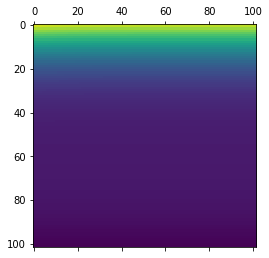

[[1613.88665836 1606.53404013 1605.23955221 ... 1594.85382283
  1594.8537986  1594.85378399]
 [1589.48867211 1587.1869923  1586.09779402 ... 1576.28877994
  1576.28876136 1576.28875326]
 [1568.87723395 1568.09009746 1567.39237703 ... 1558.39746346
  1558.3974485  1558.39744294]
 ...
 [1249.63440002 1249.63440002 1249.6344     ... 1249.63439638
  1249.63439638 1249.63439638]
 [1248.12525494 1248.12525493 1248.12525492 ... 1248.1252516
  1248.1252516  1248.1252516 ]
 [1246.55525923 1246.55525922 1246.55525921 ... 1246.555256
  1246.555256   1246.555256  ]]


In [7]:
T_out = T_out.T

# plt.xticks([i for i in range(0,N_x,10)],[int(sum(T_out[i])/N_x) for i in range(0,N_x,10)])
# plt.yticks([i for i in range(0,N_y,10)],[[i*3/1000 for i in range(0,N_y,10)]])
plt.matshow(T_out)
plt.show()
print(T_out)